In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
from enum import Enum

class ActivationType(Enum):
    LAYER_SIGMOID = 0
    LAYER_RELU = 1
    LAYER_SOFTMAX = 2
    LAYER_LINEAR = 3

In [203]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def ReLU(x):
    return np.maximum(x, 0)

def deriv_ReLU(x):
    return x > 0

def softmax(x):
    return np.exp(x) / sum(np.exp(x))

class NN():
    def __init__(self, layer_arch) -> None:
        self.biases = []
        self.weights = []
        self.activation = []
        previous_layer = layer_arch[0]
        self.activation.append(ActivationType.LAYER_LINEAR)
        for layer in layer_arch[1:]:
            if isinstance(layer, ActivationType):
                self.activation.append(layer)
            else:
                self.weights.append(np.random.rand(previous_layer, layer)-0.5)
                self.biases.append(np.zeros(layer))
                previous_layer = layer


    def feedforward(self, x):
        output = x
        for w, b, a in zip(self.weights, self.biases, self.activation):
            output = np.dot(output, w)
            output = np.add(output, b)
            if a == ActivationType.LAYER_SIGMOID:
                output = sigmoid(output)
            elif a == ActivationType.LAYER_RELU:
                output = ReLU(output)
            elif a == ActivationType.LAYER_SOFTMAX:
                output = softmax(output)
            elif a == ActivationType.LAYER_LINEAR:
                pass

        return output

    def MSE(self, Y_pred, Y_real):
        X = np.square(Y_pred - Y_real)
        return X / Y_pred.size

    def backpropagate(self):
        pass


In [195]:
train_data = pd.read_csv('mnist/mnist_train.csv')
test_data = pd.read_csv('mnist/mnist_test.csv')

train_data = np.array(train_data)
Y_train = train_data[:, 0]
X_train = train_data[:, 1:train_data.shape[0]]
X_train = X_train / 255

test_data = np.array(test_data)
Y_test = test_data[:, 0]
X_test = test_data[:, 1:test_data.shape[0]]
X_test = X_test / 255

In [187]:
def show_image(data, label):
    output = data.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(output, interpolation='nearest')
    plt.title(label)
    plt.show()
    

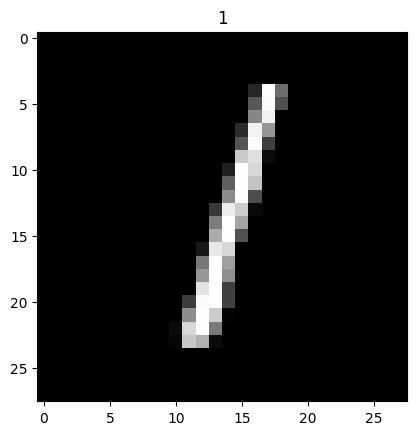

In [189]:
show_image(X_test[2], Y_test[2])

In [205]:
nno = [
    784,
    10,
    ActivationType.LAYER_SIGMOID,
    10,
    ActivationType.LAYER_SOFTMAX,
]

nn = NN(nno)

In [208]:
res = nn.feedforward(X_train[0])
Y = np.zeros(10)
Y[Y_train[0]] = Y_train[0]
# nn.MSE(res, Y_train[0])
res.sum()

4.459764044429958

In [209]:
class NeuralNetwork:
	def __init__(self, layers, alpha=0.1):
		# initialize the list of weights matrices, then store the
		# network architecture and learning rate
		self.W = []
		self.layers = layers
		self.alpha = alpha
        # start looping from the index of the first layer but
		# stop before we reach the last two layers
		for i in np.arange(0, len(layers) - 2):
			# randomly initialize a weight matrix connecting the
			# number of nodes in each respective layer together,
			# adding an extra node for the bias
			w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
			self.W.append(w / np.sqrt(layers[i]))
		# the last two layers are a special case where the input
		# connections need a bias term but the output does not
		w = np.random.randn(layers[-2] + 1, layers[-1])
		self.W.append(w / np.sqrt(layers[-2]))
	def __repr__(self):
		# construct and return a string that represents the network
		# architecture
		return "NeuralNetwork: {}".format(
			"-".join(str(l) for l in self.layers))
	def sigmoid(self, x):
		# compute and return the sigmoid activation value for a
		# given input value
		return 1.0 / (1 + np.exp(-x))
	def sigmoid_deriv(self, x):
		# compute the derivative of the sigmoid function ASSUMING
		# that x has already been passed through the 'sigmoid'
		# function
		return x * (1 - x)
	def fit(self, X, y, epochs=1000, displayUpdate=100):
		# insert a column of 1's as the last entry in the feature
		# matrix -- this little trick allows us to treat the bias
		# as a trainable parameter within the weight matrix
		X = np.c_[X, np.ones((X.shape[0]))]
		# loop over the desired number of epochs
		for epoch in np.arange(0, epochs):
			# loop over each individual data point and train
			# our network on it
			for (x, target) in zip(X, y):
				self.fit_partial(x, target)
			# check to see if we should display a training update
			if epoch == 0 or (epoch + 1) % displayUpdate == 0:
				loss = self.calculate_loss(X, y)
				print("[INFO] epoch={}, loss={:.7f}".format(
					epoch + 1, loss))
	def fit_partial(self, x, y):
		# construct our list of output activations for each layer
		# as our data point flows through the network; the first
		# activation is a special case -- it's just the input
		# feature vector itself
		A = [np.atleast_2d(x)]
		# FEEDFORWARD:
		# loop over the layers in the network
		for layer in np.arange(0, len(self.W)):
			# feedforward the activation at the current layer by
			# taking the dot product between the activation and
			# the weight matrix -- this is called the "net input"
			# to the current layer
			net = A[layer].dot(self.W[layer])
			# computing the "net output" is simply applying our
			# nonlinear activation function to the net input
			out = self.sigmoid(net)
			# once we have the net output, add it to our list of
			# activations
			A.append(out)
		# BACKPROPAGATION
		# the first phase of backpropagation is to compute the
		# difference between our *prediction* (the final output
		# activation in the activations list) and the true target
		# value
		error = A[-1] - y
		# from here, we need to apply the chain rule and build our
		# list of deltas 'D'; the first entry in the deltas is
		# simply the error of the output layer times the derivative
		# of our activation function for the output value
		D = [error * self.sigmoid_deriv(A[-1])]
		# once you understand the chain rule it becomes super easy
		# to implement with a 'for' loop -- simply loop over the
		# layers in reverse order (ignoring the last two since we
		# already have taken them into account)
		for layer in np.arange(len(A) - 2, 0, -1):
			# the delta for the current layer is equal to the delta
			# of the *previous layer* dotted with the weight matrix
			# of the current layer, followed by multiplying the delta
			# by the derivative of the nonlinear activation function
			# for the activations of the current layer
			delta = D[-1].dot(self.W[layer].T)
			delta = delta * self.sigmoid_deriv(A[layer])
			D.append(delta)
  		# since we looped over our layers in reverse order we need to
		# reverse the deltas
		D = D[::-1]
		# WEIGHT UPDATE PHASE
		# loop over the layers
		for layer in np.arange(0, len(self.W)):
			# update our weights by taking the dot product of the layer
			# activations with their respective deltas, then multiplying
			# this value by some small learning rate and adding to our
			# weight matrix -- this is where the actual "learning" takes
			# place
			self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])
	def predict(self, X, addBias=True):
		# initialize the output prediction as the input features -- this
		# value will be (forward) propagated through the network to
		# obtain the final prediction
		p = np.atleast_2d(X)
		# check to see if the bias column should be added
		if addBias:
			# insert a column of 1's as the last entry in the feature
			# matrix (bias)
			p = np.c_[p, np.ones((p.shape[0]))]
		# loop over our layers in the network
		for layer in np.arange(0, len(self.W)):
			# computing the output prediction is as simple as taking
			# the dot product between the current activation value 'p'
			# and the weight matrix associated with the current layer,
			# then passing this value through a nonlinear activation
			# function
			p = self.sigmoid(np.dot(p, self.W[layer]))
		# return the predicted value
		return p
	def calculate_loss(self, X, targets):
		# make predictions for the input data points then compute
		# the loss
		targets = np.atleast_2d(targets)
		predictions = self.predict(X, addBias=False)
		loss = 0.5 * np.sum((predictions - targets) ** 2)
		# return the loss
		return loss


In [210]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0],
	data.shape[1]))

# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data,
	digits.target, test_size=0.25)
# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# train the network
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))



[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64
[INFO] training network...
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=604.9447770
[INFO] epoch=100, loss=8.3260316
[INFO] epoch=200, loss=3.2229052
[INFO] epoch=300, loss=2.5896911
[INFO] epoch=400, loss=2.3756759
[INFO] epoch=500, loss=1.7982862
[INFO] epoch=600, loss=1.7247240
[INFO] epoch=700, loss=1.6810033
[INFO] epoch=800, loss=1.6513647
[INFO] epoch=900, loss=1.6298778
[INFO] epoch=1000, loss=1.6135822
[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.98      0.95      0.96        56
           2       0.98      1.00      0.99        44
           3       0.97      0.97      0.97        33
           4       1.00      0.98      0.99        47
           5       1.00      0.95      0.97        60
           6       1.00      1.00      1.00        40
           7       1.00      0.98      0.9

In [211]:
nn.predict(testX[0])

array([[1.18823016e-05, 2.60575406e-03, 9.22449772e-04, 6.79064823e-05,
        3.72389280e-06, 1.21253008e-04, 8.84831659e-04, 8.23741116e-06,
        9.99680452e-01, 1.01540178e-03]])